In [13]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



[]

In [14]:
d_p = 40
d_V = 5
epochs = 300    


In [15]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(80,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(d_V, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(d_V, activation='relu'),
])



In [16]:
folder_path = "data/test_data/example_data/heat2d/"

In [17]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

2025-03-17 11:01:47,529 - sciml.model.deeponet.deeponet - INFO - Model initialized with 300 epochs, 32 batch size, 0.001 learning rate


In [18]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 6417.97it/s]


In [19]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 80)
(40, 8000, 3)
(40, 8000)


In [20]:
train_history = model.fit()

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 5857.76it/s]
2025-03-17 11:01:47.992852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [40,8000]
	 [[{{node Placeholder/_2}}]]
Training progress:   0%|          | 0/300 [00:00<?, ?it/s]2025-03-17 11:01:48.012616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,8000]
	 [[{{node Placeholder/_2}}]]
2025-03-17 11:01:48.179039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore 

In [21]:
print(train_history)

([0.33610790967941284, 0.31519049406051636, 0.29600125551223755, 0.2828846573829651, 0.2799820601940155, 0.2841980755329132, 0.2846720814704895, 0.2798512279987335, 0.27356091141700745, 0.2687484323978424, 0.26603758335113525, 0.26458340883255005, 0.26324158906936646, 0.26122429966926575, 0.25828084349632263, 0.25457441806793213, 0.25054794549942017, 0.2466960847377777, 0.24339237809181213, 0.24048590660095215, 0.23722541332244873, 0.23281751573085785, 0.22752797603607178, 0.222360298037529, 0.21800757944583893, 0.21409861743450165, 0.2096422016620636, 0.2043258398771286, 0.1987110674381256, 0.19338580965995789, 0.18841509521007538, 0.18423563241958618, 0.18053364753723145, 0.1765531301498413, 0.17279118299484253, 0.16947826743125916, 0.1663992702960968, 0.16376465559005737, 0.16118207573890686, 0.15881206095218658, 0.1569249927997589, 0.15527263283729553, 0.1539011299610138, 0.15267065167427063, 0.15151338279247284, 0.15058743953704834, 0.14976023137569427, 0.14895612001419067, 0.1481

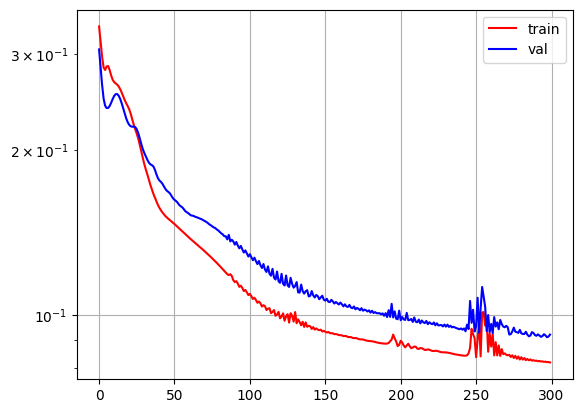

In [22]:
plt.plot(train_history[0],c='r')
plt.plot(train_history[1],c='b')
plt.legend(['train','val'])
#log 
plt.yscale('log')
plt.grid()
plt.show()

In [ ]:
# Get predictions from external model for 5 different inputs
n_samples = 5
t_slices = [10, 20]  # Time points to visualize

# Create sample inputs (3D points - x,y,t)
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
inputs = []

for t in t_slices:
    points = np.stack([X.flatten(), Y.flatten(), np.ones_like(X.flatten())*t], axis=-1)
    inputs.append(points)
inputs = np.concatenate(inputs, axis=0)

# Get predictions
preds = external_model(inputs).numpy()
preds = preds.reshape(len(t_slices), 50, 50, -1)  # Reshape to (n_times, height, width, n_outputs)

# Plot heatmaps
fig, axes = plt.subplots(len(t_slices), 5, figsize=(20, 8))
for i, t in enumerate(t_slices):
    for j in range(5):
        im = axes[i,j].imshow(preds[i,:,:,j], cmap='viridis', extent=[0,1,0,1])
        axes[i,j].set_title(f'Output {j+1}, t={t}')
        plt.colorbar(im, ax=axes[i,j])
        
plt.tight_layout()
plt.show()